In [5]:
library('purrr')
library('tidyverse')

theme_set(theme_gray(base_size = 16))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
tosses = c(rep('heads', 140), rep('tails', 110))

tosses[1:5]

[1] "heads" "heads" "heads" "heads" "heads"

In [7]:
length(tosses)

[1] 250

In [8]:
bootstrap_resample = function(tosses, expected = 125) {

result = sample(tosses, replace = TRUE)

result_df = data.frame(outcome = result) |>
    count(outcome) |>
    filter(outcome == 'heads') |>
    mutate(difference_from_expected = n - expected)

return(result_df)
}

n_resamplings = 1000

samples_df = map_df(1:n_resamplings, ~bootstrap_resample(tosses), .id = 'sample_id')

samples_df |> head()

,sample_id,outcome,n,difference_from_expected
,<chr>,<chr>,<int>,<dbl>
1,1,heads,141,16
2,2,heads,134,9
3,3,heads,133,8
4,4,heads,139,14
5,5,heads,135,10
6,6,heads,138,13


In [9]:
get_percentiles = function(x, q=c(0.025, 0.5, 0.975)) {
    tibble(value = quantile(x, q), percentile = q)
}

percentile_df = samples_df |>
    reframe(get_percentiles(difference_from_expected, q=c(0.025, 0.975))) |>
    tidyr::pivot_wider(names_from = percentile)
    
percentile_df

0.025,0.975
<dbl>,<dbl>
-0.025,30.025


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


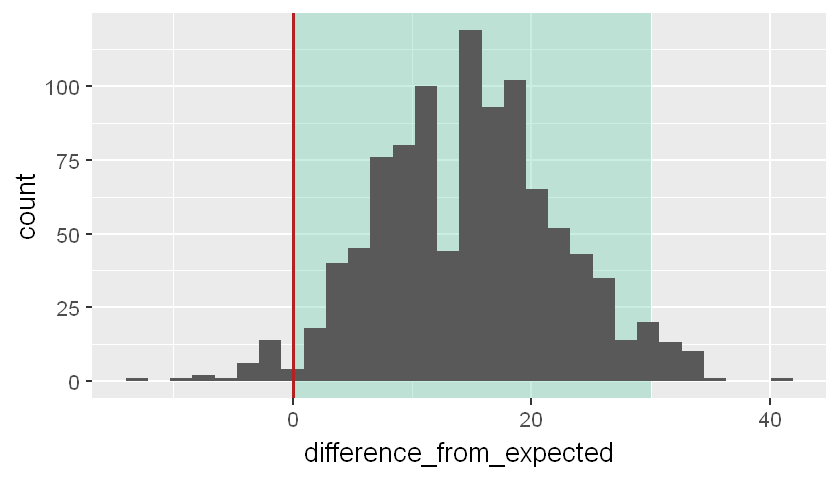

In [10]:
options(repr.plot.width = 7, repr.plot.height = 4)

p = ggplot() + 
    geom_rect(data = percentile_df, 
              mapping = aes(xmin = `0.025`, xmax = `0.975`, ymin = -Inf, ymax = Inf),
              alpha = 0.35, fill = 'MediumAquaMarine') +
    geom_histogram(data = samples_df, mapping = aes(x = difference_from_expected)) +
    geom_vline(xintercept = 0, color = 'firebrick', linewidth = 1)

p